#1. File Upload

In [1]:
from google.colab import files
upload_file = files.upload()

Saving car1.jpg to car1.jpg


#2. Load File

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [5]:
print("OpenCV version: ", cv2.__version__)

OpenCV version:  4.1.2


In [6]:
!ls -al

total 96
drwxr-xr-x 1 root root  4096 Mar  8 02:54 .
drwxr-xr-x 1 root root  4096 Mar  8 02:51 ..
-rw-r--r-- 1 root root 77963 Mar  8 02:54 car1.jpg
drwxr-xr-x 4 root root  4096 Mar  1 14:35 .config
drwxr-xr-x 1 root root  4096 Mar  1 14:35 sample_data


In [8]:
img = cv2.imread('car1.jpg')

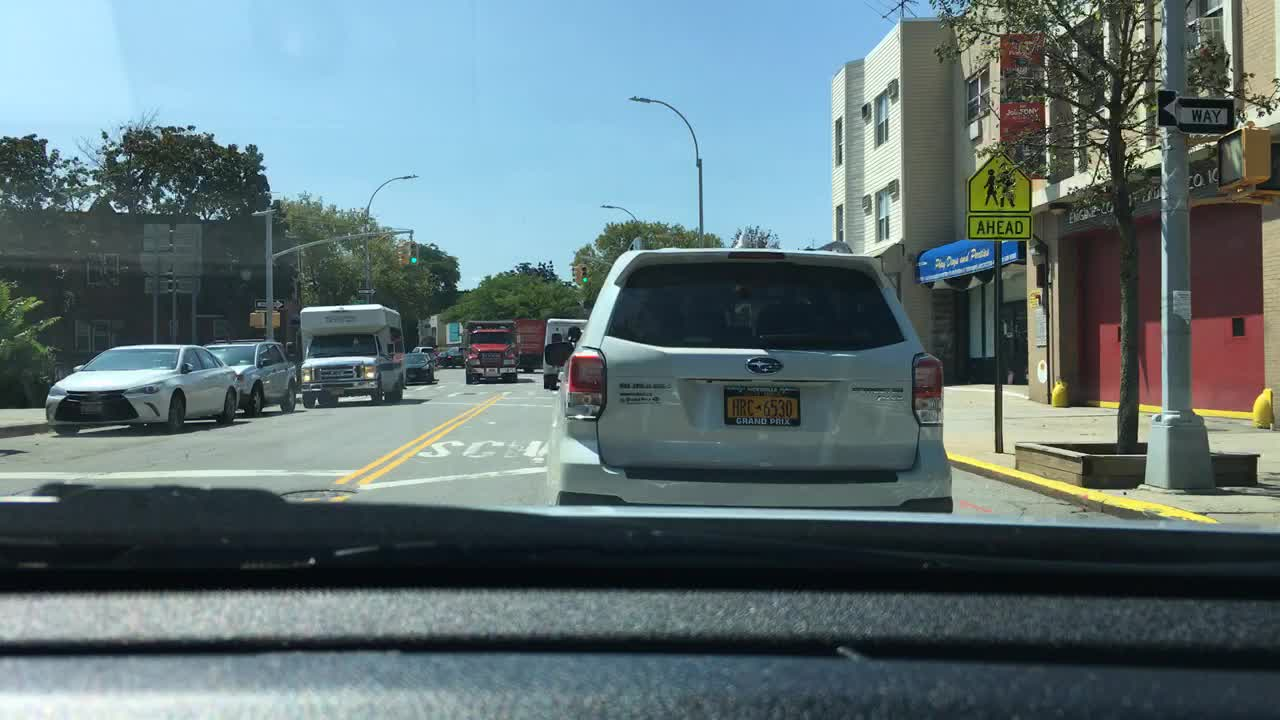

width: 1280 pixels
heigh: 720 pixels
channels: 3
720 1280 (640, 360)


In [10]:
cv2_imshow(img)

print("width: {} pixels".format(img.shape[1]))
print("heigh: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))

(height, width) = img.shape[:2]
center = (width // 2, height // 2)

print(height, width, center)

In [37]:
X = 279 #@param {type:"slider", min:0, max:1280, step:1}
Y = 291 #@param {type:"slider", min:0, max:720, step:1}
SIZE = 500 #@param {type:"slider", min:0, max:1280, step:1}

In [12]:
(b,g,r) = img[X, Y]
print("Pixel at ({}, {}) - Red: {}, Green: {}, Blue: {}".format(X, Y, r, g, b))

Pixel at (153, 354) - Red: 157, Green: 212, Blue: 242


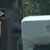

In [17]:
# Crop cordination = image[y: y+h, x:x+w]
croped = img[Y:Y+SIZE, X:X+SIZE]
cv2_imshow(croped)

In [18]:
img[Y:Y+SIZE, X:X+SIZE] = (0, 0, 255)

In [ ]:
cv2.rectangle(img, (X+SIZE*2, Y), (X+SIZE*3, Y+SIZE), (0,255, 0), 5)

In [ ]:
radius = int(SIZE/2)
cv2.circle(img, (X+SIZE*4, Y+radius), radius, (255,255, 0), -1)

In [ ]:
cv2.line(img, (X+SIZE*5, Y), (X+SIZE*6, Y+SIZE), (0, 255, 255), 5)

In [ ]:
cv2.putText(img, 'creApple', (X+SIZE*7, Y+SIZE), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0))

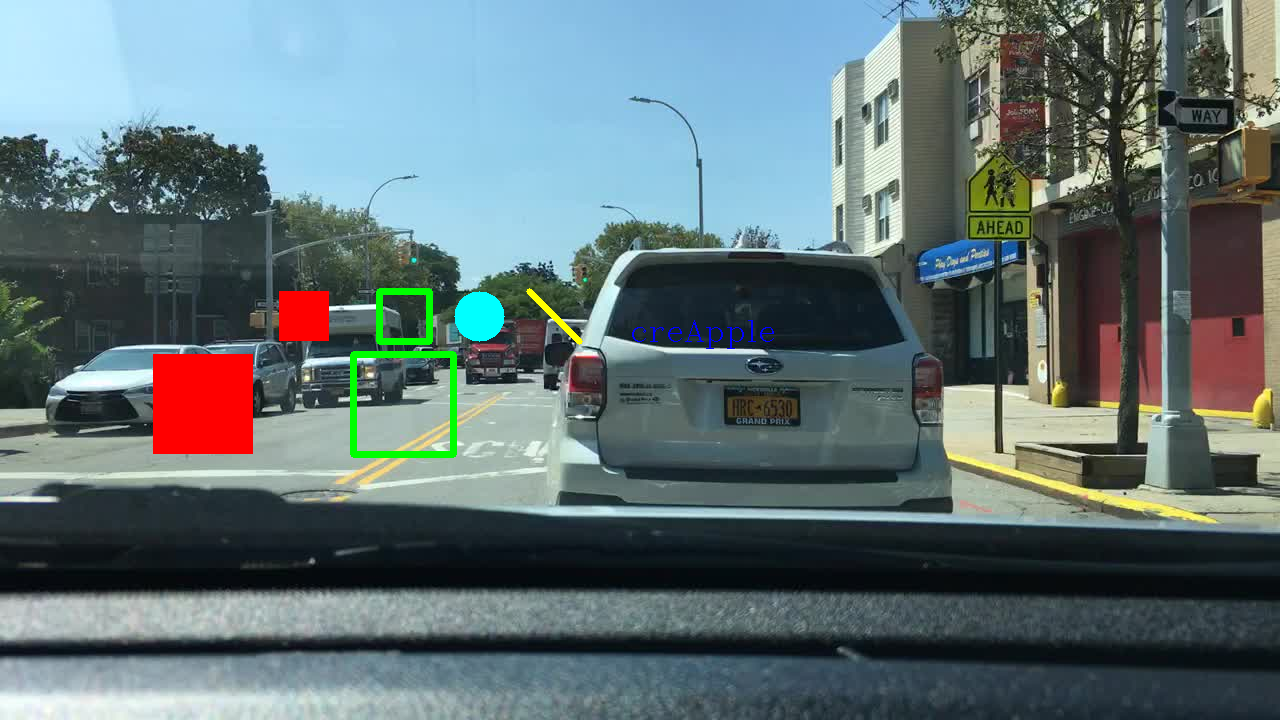

In [23]:
cv2_imshow(img)

In [24]:
cv2.imwrite('car-copy.jpg', img)

True

In [25]:
!ls -al

total 276
drwxr-xr-x 1 root root   4096 Mar  8 03:01 .
drwxr-xr-x 1 root root   4096 Mar  8 02:51 ..
-rw-r--r-- 1 root root  77963 Mar  8 02:54 car1.jpg
-rw-r--r-- 1 root root 183095 Mar  8 03:01 car-copy.jpg
drwxr-xr-x 4 root root   4096 Mar  1 14:35 .config
drwxr-xr-x 1 root root   4096 Mar  1 14:35 sample_data


In [26]:
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except ImportError:
        import os
        print('Error download: ', os.path.join(os, getcwd(), path))

In [27]:
download('car-copy.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

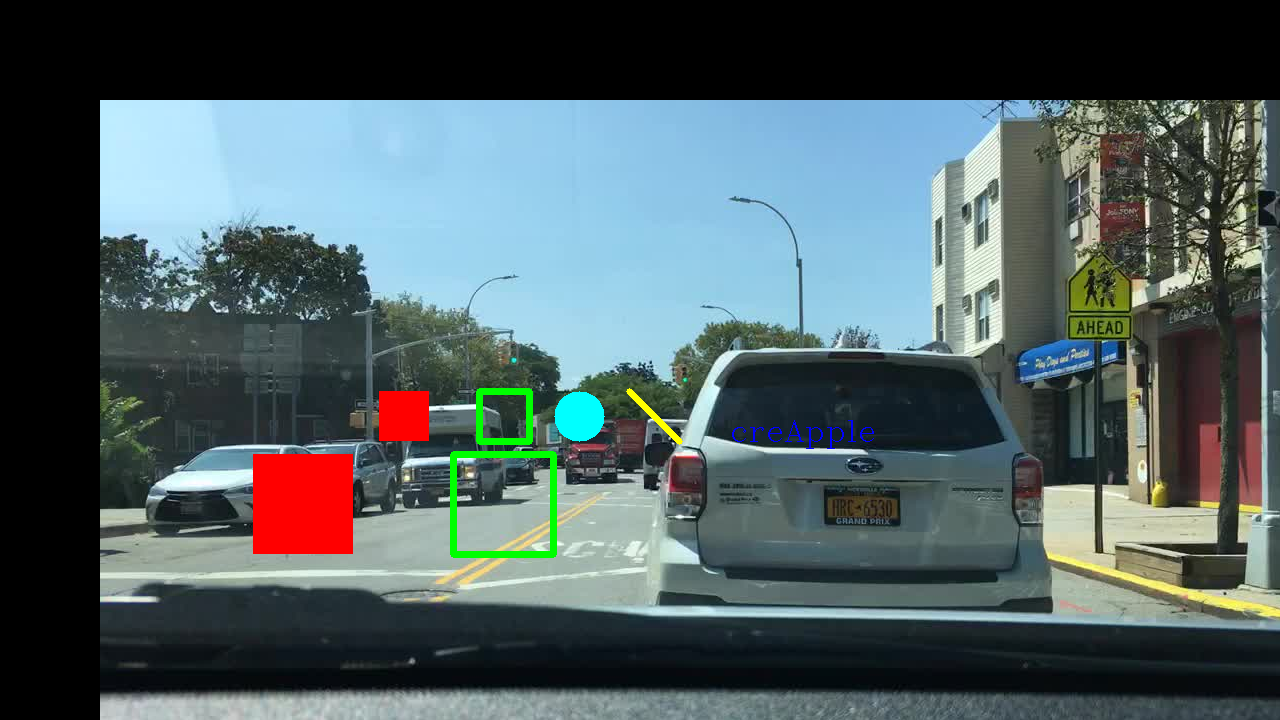

In [29]:
# Moved down: +, up: - and right: +, left - 
move = np.float32([[1, 0, 100], [0, 1, 100]])
moved = cv2.warpAffine(img, move, (width, height))
cv2_imshow(moved)

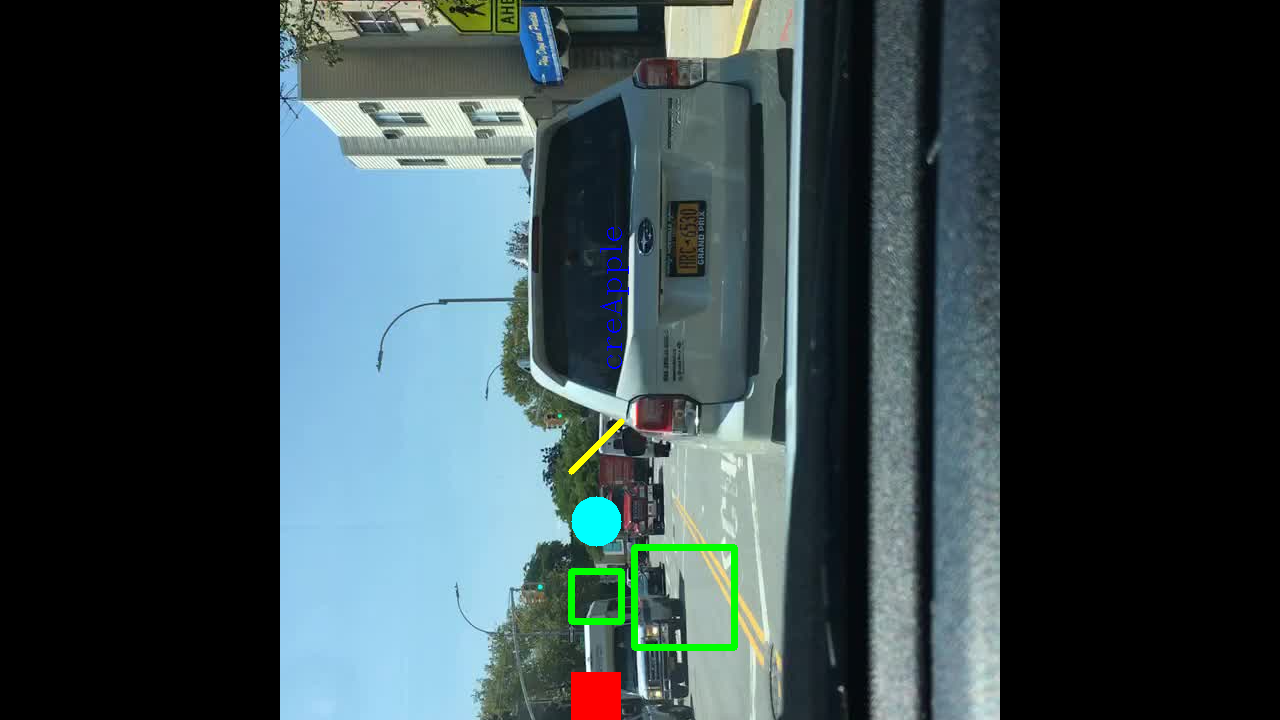

In [31]:
rotate = cv2.getRotationMatrix2D(center, 90, 1.0)
rotated = cv2. warpAffine(img, rotate, (width, height))
cv2_imshow(rotated)

In [40]:
ratio = SIZE / width
dimension = (SIZE, int(height*ratio))

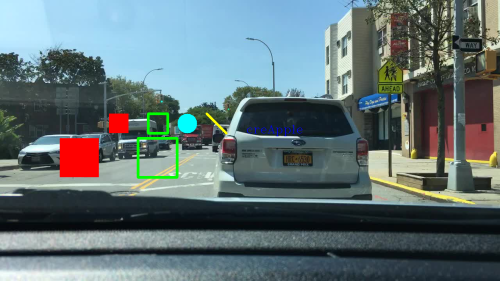

In [41]:
resized = cv2.resize(img, dimension, interpolation=cv2.INTER_AREA)
cv2_imshow(resized)

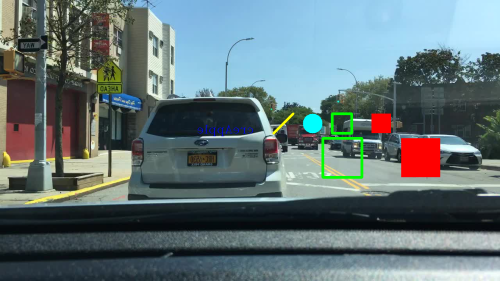

In [43]:
#Flipped Horizontal 1, Vertical 0, both -1 
flipped = cv2.flip(resized, 1)
cv2_imshow(flipped)